In [3]:
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Codifique e exiba a matriz de correlação entre as variáveis numéricas.
Além disso, qual é a correlação entre o preço price e o número de
quartos bedrooms? Existe alguma diferença na correlação quando
consideramos apenas casas com uma área total sqft_living superior a
2000 pés quadrados?

In [15]:
df = pd.read_csv('/content/drive/MyDrive/Womakers/kc_house_data.csv.xls')

print(df.dtypes)

df_numeric = df.select_dtypes(include=[float, int])

corr_matrix = df_numeric.corr()
print("Matriz de correlação entre variáveis numéricas:")
print(corr_matrix)

corr_price_bedrooms = corr_matrix['price']['bedrooms']
print(f"Correlação entre preço e número de quartos: {corr_price_bedrooms}")

df_filtered = df[df['sqft_living'] > 2000]

df_filtered_numeric = df_filtered.select_dtypes(include=[float, int])

corr_filtered = df_filtered_numeric.corr()

corr_price_bedrooms_filtered = corr_filtered['price']['bedrooms']
print(f"Correlação entre preço e número de quartos (sqft_living > 2000): {corr_price_bedrooms_filtered}")


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object
Matriz de correlação entre variáveis numéricas:
                     id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000  0.005779  0.013855   0.007435     0.000415 -0.132510   
price          0.005779  1.000000  0.299207   0.521193     0.702199  0.090720   
bedrooms       0.013855  0.299207  1.000000   0.539449     0.573915  0.028929   
bathrooms      0.007435  0.521193  0.539449   1.000000     0.764810  0.091268   
sqft_liv

2. Existe alguma correlação entre o preço price e a área total da casa
sqft_living, considerando apenas casas com pelo menos dois
banheiros bathrooms?

In [16]:
df_filtered_bathrooms = df[df['bathrooms'] >= 2]

df_filtered_numeric = df_filtered_bathrooms.select_dtypes(include=[float, int])

corr_filtered = df_filtered_numeric.corr()

corr_price_sqft_living = corr_filtered['price']['sqft_living']
print(f"Correlação entre preço e área total da casa (sqft_living) para casas com pelo menos dois banheiros: {corr_price_sqft_living}")


Correlação entre preço e área total da casa (sqft_living) para casas com pelo menos dois banheiros: 0.7067107107996191


3. Como a quantidade de banheiros bathrooms influencia na correlação
entre a área total da casa sqft_living e o preço price?

In [17]:
def calcular_correlacao_banheiros(banheiros):
    df_filtered = df[df['bathrooms'] == banheiros]

    df_filtered_numeric = df_filtered[['price', 'sqft_living']]

    if not df_filtered_numeric.empty:
        corr = df_filtered_numeric.corr().loc['price', 'sqft_living']
        print(f"Correlação entre preço e área total da casa para {banheiros} banheiros: {corr}")
    else:
        print(f"Nenhuma casa com {banheiros} banheiros encontrada.")

for banheiros in sorted(df['bathrooms'].unique()):
    calcular_correlacao_banheiros(banheiros)

Correlação entre preço e área total da casa para 0.0 banheiros: 0.9168369900304428
Correlação entre preço e área total da casa para 0.5 banheiros: nan
Correlação entre preço e área total da casa para 0.75 banheiros: 0.357177770473229
Correlação entre preço e área total da casa para 1.0 banheiros: 0.3595286628620832
Correlação entre preço e área total da casa para 1.25 banheiros: 0.16733066253227102
Correlação entre preço e área total da casa para 1.5 banheiros: 0.4234046759314356
Correlação entre preço e área total da casa para 1.75 banheiros: 0.4492245191723365
Correlação entre preço e área total da casa para 2.0 banheiros: 0.44694458674958343
Correlação entre preço e área total da casa para 2.25 banheiros: 0.5982740756375267
Correlação entre preço e área total da casa para 2.5 banheiros: 0.5599451984669489
Correlação entre preço e área total da casa para 2.75 banheiros: 0.52239652820746
Correlação entre preço e área total da casa para 3.0 banheiros: 0.5690329087491444
Correlação entr

4. Qual é a relação entre a condição da casa condition e o preço price,
considerando apenas casas com uma área total sqft_living superior a
3000 pés quadrados?

In [18]:
df_filtered_sqft = df[df['sqft_living'] > 3000]

corr_condition_price = df_filtered_sqft[['condition', 'price']].corr().loc['condition', 'price']

print(f"Correlação entre a condição da casa e o preço, considerando casas com área total > 3000 sqft: {corr_condition_price}")


Correlação entre a condição da casa e o preço, considerando casas com área total > 3000 sqft: 0.10527844723732628


5. Existe alguma correlação entre a localização geográfica lat e long e o
preço price para casas com pelo menos três quartos bedrooms?

In [19]:
df_filtered_bedrooms = df[df['bedrooms'] >= 3]

df_filtered_geo = df_filtered_bedrooms[['price', 'lat', 'long']]

corr_geo_price = df_filtered_geo.corr()

print("Correlação entre localização geográfica (lat, long) e preço para casas com pelo menos 3 quartos:")
print(corr_geo_price['price'][['lat', 'long']])


Correlação entre localização geográfica (lat, long) e preço para casas com pelo menos 3 quartos:
lat     0.312555
long   -0.007275
Name: price, dtype: float64


6. Calcule a correlação entre uma variável categórica(waterfront) e uma
variável numérica(price) usando ANOVA.

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

anova_model = ols('price ~ C(waterfront)', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

print(anova_table)


                     sum_sq      df           F         PR(>F)
C(waterfront)  1.250790e+14     1.0  964.573325  2.973808e-202
Residual       1.296339e+15  9997.0         NaN            NaN


Considerando a base de dados car_price.csv responda as questões de 7 a 11
abaixo

7. Codifique e exiba a Matriz de correlação para as variáveis numéricas e
dê exemplos de correlações positivas, negativas e neutras.

In [22]:
df_car = pd.read_csv('/content/drive/MyDrive/Womakers/car_price.csv.xls')

df_car_numeric = df_car.select_dtypes(include=[float, int])

corr_matrix_car = df_car_numeric.corr()

print(corr_matrix_car)

print("Exemplo de correlação positiva:", corr_matrix_car.loc['Price'].idxmax())
print("Exemplo de correlação negativa:", corr_matrix_car.loc['Price'].idxmin())


                       Price      Year  Kilometer    Length     Width  \
Price               1.000000  0.309381  -0.147276  0.568875  0.577100   
Year                0.309381  1.000000  -0.291740  0.085178  0.182220   
Kilometer          -0.147276 -0.291740   1.000000  0.037817  0.008479   
Length              0.568875  0.085178   0.037817  1.000000  0.797228   
Width               0.577100  0.182220   0.008479  0.797228  1.000000   
Height              0.092968  0.126849   0.085728  0.194704  0.326928   
Seating Capacity   -0.024879 -0.000113   0.111103  0.298527  0.229056   
Fuel Tank Capacity  0.586109  0.044859   0.052447  0.809812  0.791316   

                      Height  Seating Capacity  Fuel Tank Capacity  
Price               0.092968         -0.024879            0.586109  
Year                0.126849         -0.000113            0.044859  
Kilometer           0.085728          0.111103            0.052447  
Length              0.194704          0.298527            0.809812

8. Codifique e exiba Gráficos de Dispersão para cada uma das variáveis
numéricas em relação à variável de interesse Price.

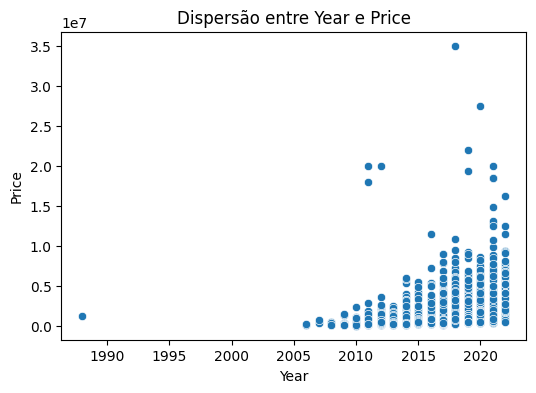

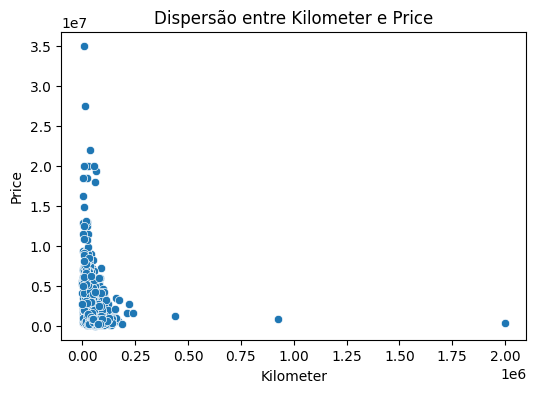

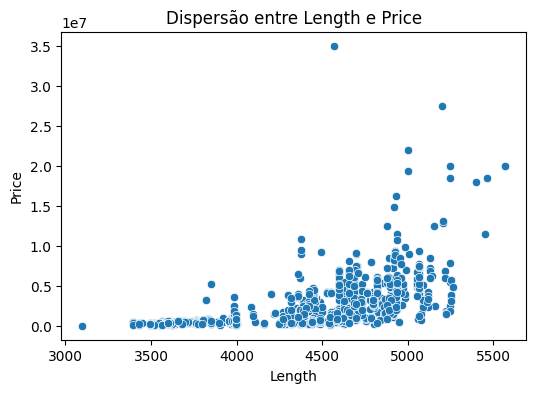

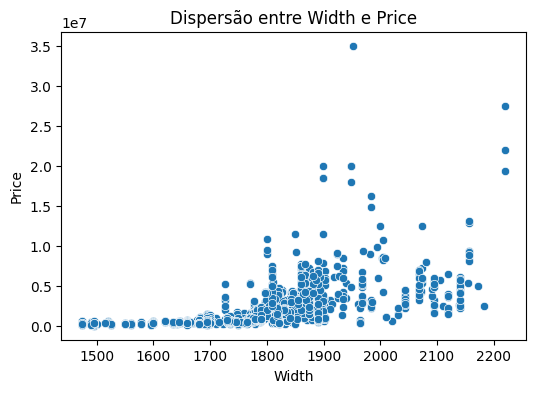

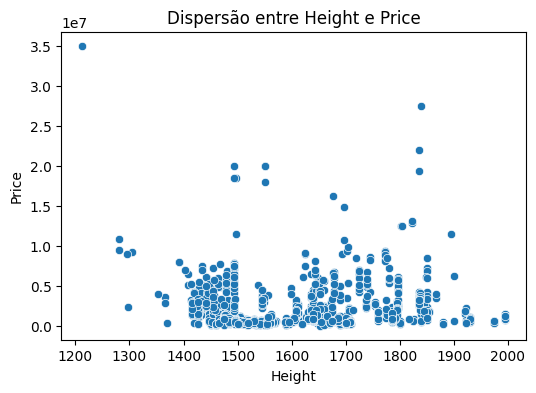

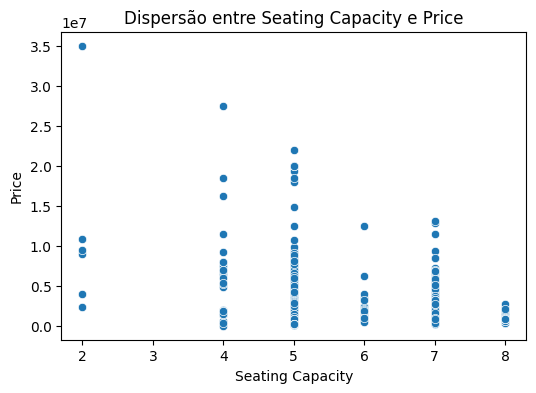

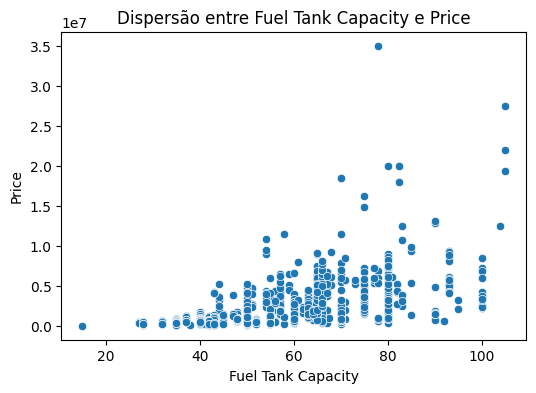

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df_car_numeric.columns:
    if col != 'Price':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=df_car, x=col, y='Price')
        plt.title(f'Dispersão entre {col} e Price')
        plt.show()


9. Crie um modelo de Regressão Linear Simples, exiba a Tabela de
Regressão e exiba o plot da Reta Estimada.

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     41.50
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           1.49e-10
Time:                        21:47:45   Log-Likelihood:                -30189.
No. Observations:                1874   AIC:                         6.038e+04
Df Residuals:                    1872   BIC:                         6.039e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.041e+06   7.48e+04     27.302      0.0

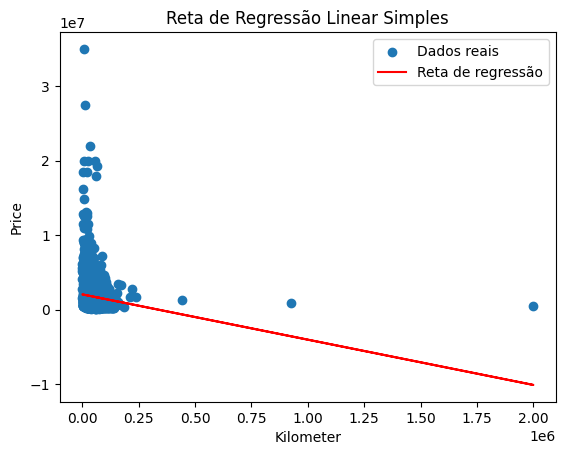

In [27]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

X = df_car[['Kilometer']]
y = df_car['Price']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

plt.scatter(df_car['Kilometer'], y, label="Dados reais")
plt.plot(df_car['Kilometer'], model.predict(X), color='red', label="Reta de regressão")
plt.xlabel('Kilometer')
plt.ylabel('Price')
plt.title('Reta de Regressão Linear Simples')
plt.legend()
plt.show()


10. Codifique e exiba o gráfico dos resíduos do modelo de Regressão
Simples.

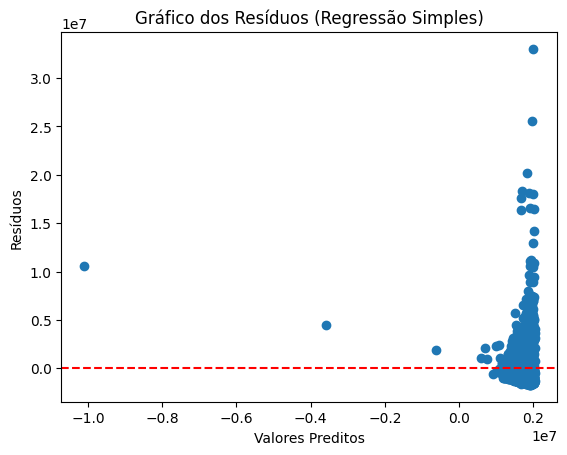

In [28]:
plt.scatter(model.predict(X), model.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Gráfico dos Resíduos (Regressão Simples)')
plt.show()


11. Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão
e exiba o gráfico dos resíduos do modelo.

Make                   object
Model                  object
Price                   int64
Year                    int64
Kilometer               int64
Fuel Type              object
Transmission           object
Location               object
Color                  object
Owner                  object
Seller Type            object
Engine                 object
Max Power              object
Max Torque             object
Drivetrain             object
Length                float64
Width                 float64
Height                float64
Seating Capacity      float64
Fuel Tank Capacity    float64
dtype: object
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     582.0
Date:                Mon, 14 Oct 2024   Prob (F-statistic):          4

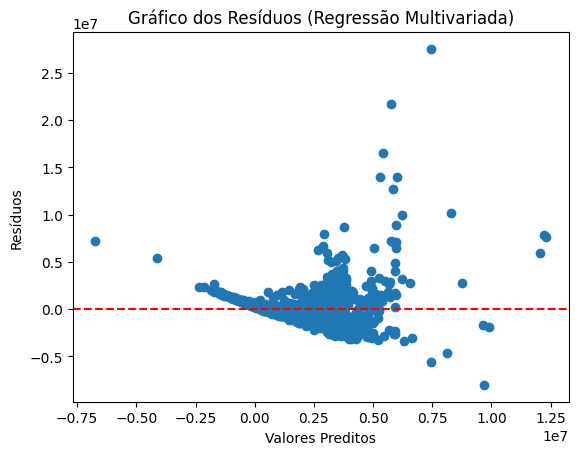

In [38]:
df_car = df_car.replace([np.inf, -np.inf], np.nan)
df_car = df_car.dropna(subset=['Year', 'Kilometer', 'Engine', 'Price'])

if df_car['Engine'].dtype == object:
    df_car['Engine'] = df_car['Engine'].str.extract('(\d+)')[0].astype(float)

df_car = df_car.dropna(subset=['Year', 'Kilometer', 'Engine', 'Price'])

X_multi = df_car[['Year', 'Kilometer', 'Engine']]
y_multi = df_car['Price']

X_multi = sm.add_constant(X_multi)

model_multi = sm.OLS(y_multi, X_multi).fit()

print(model_multi.summary())

plt.scatter(model_multi.predict(X_multi), model_multi.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Gráfico dos Resíduos (Regressão Multivariada)')
plt.show()